In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("spotify_millsongdata.csv")

In [3]:
df.head(5)

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [4]:
df.tail(5)

,artist,song,link,text
57645,Ziggy Marley,Good Old Days,/z/ziggy+marley/good+old+days_10198588.html,Irie days come on play \r\nLet the angels fly...
57646,Ziggy Marley,Hand To Mouth,/z/ziggy+marley/hand+to+mouth_20531167.html,Power to the workers \r\nMore power \r\nPowe...
57647,Zwan,Come With Me,/z/zwan/come+with+me_20148981.html,all you need \r\nis something i'll believe \...
57648,Zwan,Desire,/z/zwan/desire_20148986.html,northern star \r\nam i frightened \r\nwhere ...
57649,Zwan,Heartsong,/z/zwan/heartsong_20148991.html,come in \r\nmake yourself at home \r\ni'm a ...


In [5]:
df.shape

(57650, 4)

In [6]:
df.isnull().sum()

artist    0
song      0
link      0
text      0
dtype: int64

In [7]:
df =df.sample(5000).drop('link', axis=1).reset_index(drop=True)

In [8]:
df.head(10)

,artist,song,text
0,Rascal Flatts,She Goes All The Way,"No limits, no lines are drawn \r\nThe whole w..."
1,Ray Charles,Everytime We Say Goodbye,"Oh, Everytime we say goodbye I die a little \..."
2,Stone Temple Pilots,Hickory Dichotomy,"Alright, alright, alright, come on \r\nAlrigh..."
3,Santana,You Know That I Love You,"Yesterday, I was alone and blue \r\nMy heart ..."
4,Bee Gees,For Whom The Bell Tolls,I stumble in the night \r\nNever really knew ...
5,The Jam,I Need You For Someone,"I need you to keep me straight, \r\nWhen the ..."
6,Billie Holiday,Ain't Nobody's Business If I Do,There ain't nothing I can do \r\nOr nothing I...
7,Judas Priest,Rocka Rolla,"Man eatin momma, steam driven hammer \r\nSort..."
8,Fiona Apple,Used To Love Him,Those boon times went bust \r\nMy feet of cla...
9,Ufo,Follow You Home,If you want me to do everything girl just for ...


In [9]:
df['text'][0]

"No limits, no lines are drawn  \r\nThe whole world disappears when  \r\nWe're alone  \r\nThat thin white cotton dress is  \r\nBlowin' in the wind  \r\nShe takes my hand and the dance begins  \r\n  \r\n[Chorus]  \r\nWith every move she makes  \r\nI'm deeper than I've been  \r\nHolding on and letting go  \r\nShe just keeps givin' in  \r\nTakin' me higher and further  \r\nThere she goes again givin' more than  \r\nShe takes  \r\n'Cause it's more than love she makes  \r\nShe goes all the way  \r\n  \r\nNo questions, no talking at all  \r\nOnly the sound of our hearts as the fall  \r\nNo matter what I need, her answer's  \r\nAlways yes  \r\nI only have to dream and she does the  \r\nRest  \r\n  \r\n[Chorus: x2]  \r\n  \r\nOh, oh, oh  \r\nMy baby goes all the way, the way  \r\nShe goes all the way  \r\nMy baby goes all the way  \r\nOh, yeah, yeah, yeah\r\n\r\n"

In [10]:
# df = df.sample(5000)

In [11]:
df.shape

(5000, 3)

Text Cleaning/ Text Preprocessing

In [12]:
df['text'] = df['text'].str.lower().replace(r'^\w\s', ' ').replace(r'\n', ' ', regex = True)

In [13]:
import nltk
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
nltk.download('punkt')

def tokenization(txt):
    tokens = nltk.word_tokenize(txt)
    stemming = [stemmer.stem(w) for w in tokens]
    return " ".join(stemming)

[nltk_data] Error loading punkt: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>


In [14]:
df['text'] = df['text'].apply(lambda x: tokenization(x))

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [16]:
tfidvector = TfidfVectorizer(analyzer='word',stop_words='english')
matrix = tfidvector.fit_transform(df['text'])
similarity = cosine_similarity(matrix)

In [17]:
similarity[0]

array([1.        , 0.02380896, 0.00357452, ..., 0.01024969, 0.07496461,
       0.00665409])

In [18]:
df[df['song'] == 'Run Boy, Run']

,artist,song,text


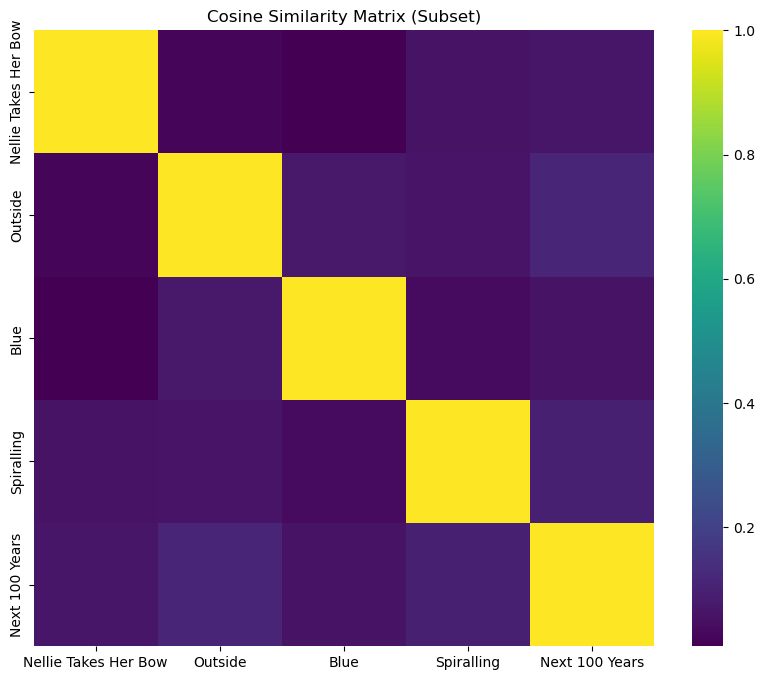

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
sample_size = 5
sample_indices = df.sample(sample_size).index
subset_similarity = similarity[sample_indices][:, sample_indices]

plt.figure(figsize=(10, 8))
sns.heatmap(subset_similarity, cmap="viridis", xticklabels=df.iloc[sample_indices]['song'], yticklabels=df.iloc[sample_indices]['song'])
plt.title("Cosine Similarity Matrix (Subset)")
plt.show()

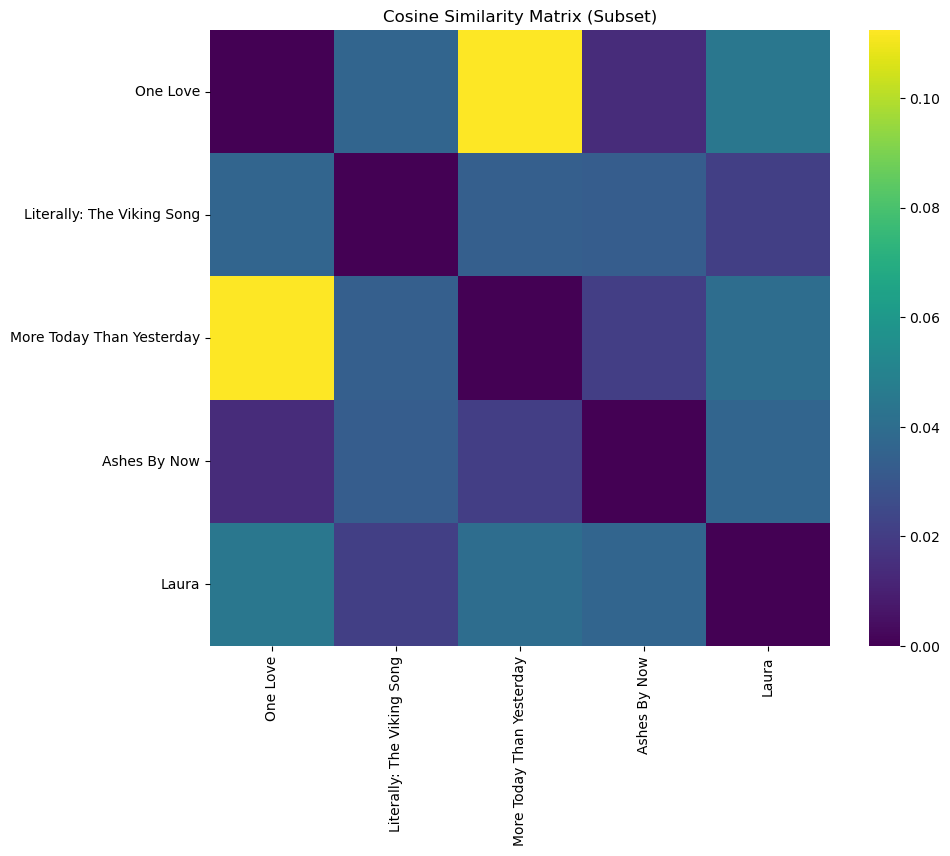

In [39]:
import numpy as np
sample_size = 5  # Adjust as needed
sample_indices = df.sample(sample_size).index
subset_similarity = similarity[sample_indices][:, sample_indices]

# Set diagonal elements to 0 to exclude self-similarity
subset_similarity = subset_similarity - np.diag(np.diag(subset_similarity))

plt.figure(figsize=(10, 8))
sns.heatmap(subset_similarity, cmap="viridis", xticklabels=df.iloc[sample_indices]['song'], yticklabels=df.iloc[sample_indices]['song'])
plt.title("Cosine Similarity Matrix (Subset)")
plt.show()

In [ ]:
def recommendation(song_df):
    idx = df[df['song'] == song_df].index[0]
    distances = sorted(list(enumerate(similarity[idx])),reverse=True,key=lambda x:x[1])
    
    songs = []
    for m_id in distances[1:21]:
        songs.append(df.iloc[m_id[0]].song)
        
    return songs

In [ ]:
recommendation('The Shadow')

In [22]:
import pickle
pickle.dump(similarity,open('similarity.pkl','wb'))
pickle.dump(df,open('df.pkl','wb'))